In [1]:
import torch
from utils import *
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [2]:
# Data parameters
srgan_checkpoint = "./checkpoint_srgan.pth.tar"
HR_image_path = '../data/SRDataset/benchmark/Set14/HR/baboon.png'
LR_image_path = '../data/SRDataset/benchmark/Set14/LR_bicubic/X4/baboonx4.png'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("mps")

In [3]:
# Load models
srgan_generator = torch.load(srgan_checkpoint)['generator'].to(device)
srgan_generator.eval()

Generator(
  (net): SRResNet(
    (conv_block1): ConvolutionalBlock(
      (conv): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
      (conv_block): Sequential(
        (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (1): PReLU(num_parameters=1)
      )
    )
    (res1): ResidualBlock(
      (conv_block1): ConvolutionalBlock(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv_block): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): PReLU(num_parameters=1)
        )
      )
      (conv_block2): ConvolutionalBlock(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (conv_block): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(64, eps=1

In [4]:
hr_img = Image.open(HR_image_path, mode="r")
hr_img = hr_img.convert('RGB')
lr_img = Image.open(LR_image_path, mode="r")
lr_img = lr_img.convert('RGB')

In [5]:
# Bicubic Upsampling
bicubic_img = lr_img.resize((hr_img.width, hr_img.height), Image.BICUBIC)
# Super-resolution (SR) with SRGAN
sr_img_srgan = srgan_generator(convert_image(lr_img, source='pil', target='imagenet-norm', device=device).unsqueeze(0).to(device))
sr_img_srgan = sr_img_srgan.squeeze(0).detach()
sr_img_srgan = convert_image(sr_img_srgan, source='[-1, 1]', target='pil', device=device)

/var/folders/hz/bp3zfb3d5hxgwc24y_9p7pth0000gn/T/ipykernel_20277/4221013927.py:2: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  bicubic_img = lr_img.resize((hr_img.width, hr_img.height), Image.BICUBIC)


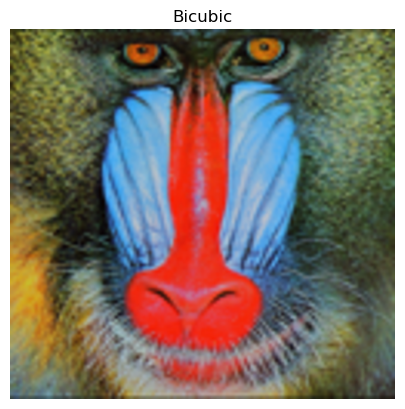

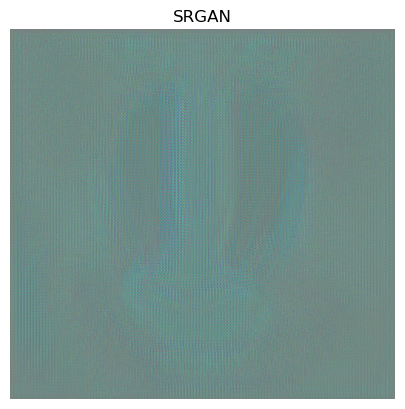

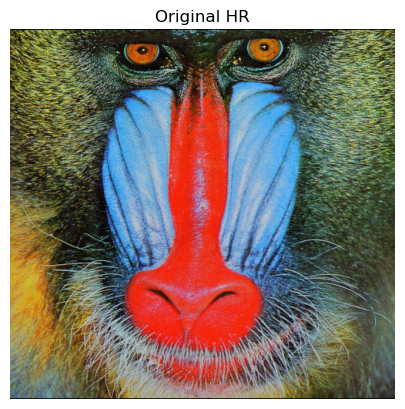

In [6]:
# Visualization
plt.figure('Bicubic')
plt.imshow(bicubic_img)
plt.axis('off')
plt.title('Bicubic')
plt.figure('SRGAN')
plt.imshow(sr_img_srgan)
plt.axis('off')
plt.title('SRGAN')
plt.figure('Original HR')
plt.imshow(hr_img)
plt.axis('off')
plt.title('Original HR')
plt.show()